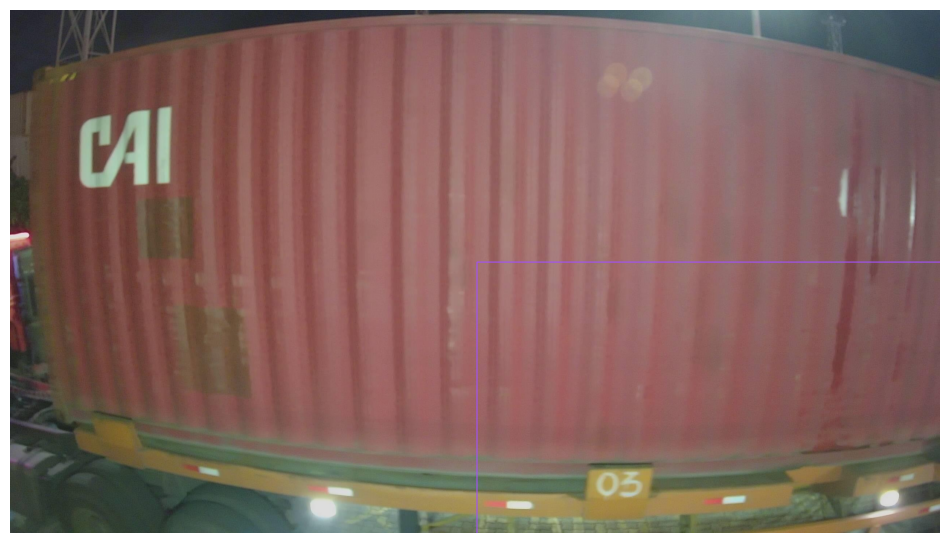

In [2]:
import supervision as sv
import cv2
import os
import numpy as np

base_path = "/home/emma/facultad/pps/scripts/data-harmonizer/testing/train"
image_name = "20240526_220943-519_Camera_3_jpg.rf.43f244f3243bc0b64547f213007ee7e9.jpg"

image_path = os.path.join(base_path, "images", image_name)
label_path = os.path.join(base_path, "labels", image_name.replace('.jpg', '.txt'))

image = cv2.imread(image_path)
height, width = image.shape[:2]

# ---- Load YOLO labels ----
labels = []
with open(label_path, "r") as f:
    for line in f:
        parts = line.strip().split()
        labels.append([float(x) for x in parts])

labels = np.array(labels)
class_ids = labels[:, 0].astype(int)
xywh = labels[:, 1:5]

# ---- Convert normalized YOLO (x_center, y_center, w, h) -> absolute xyxy ----
xyxy = sv.xywh_to_xyxy(xywh * np.array([width, height, width, height]))

# ---- Create detections manually ----
detections = sv.Detections(
    xyxy=xyxy,
    class_id=class_ids
)

# ---- Annotate ----
box_annotator = sv.BoxAnnotator()
annotated = box_annotator.annotate(scene=image.copy(), detections=detections)

sv.plot_image(annotated)


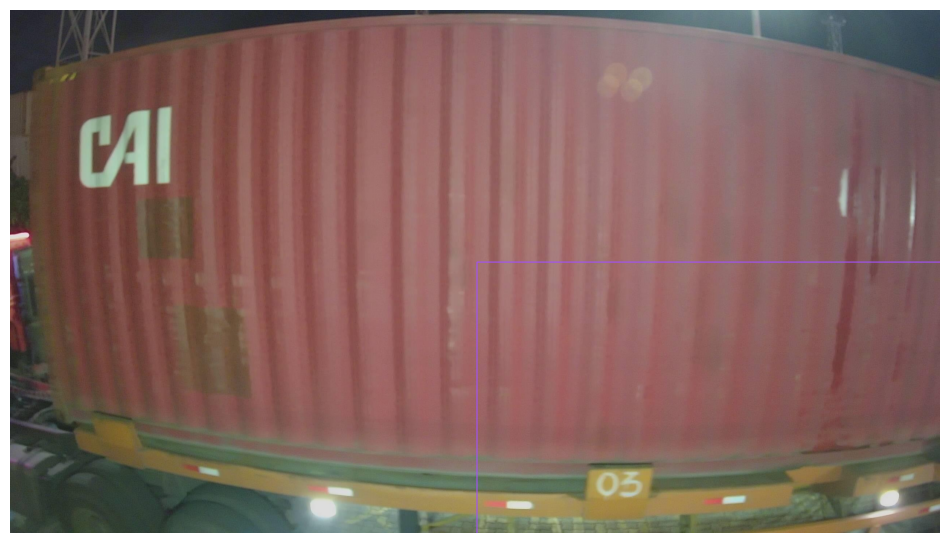

In [3]:
import supervision as sv
import cv2
import os
import numpy as np

base_path = "/home/emma/facultad/pps/datasets/containers/raw/container.v1i.yolov11/train"
image_name = "20240526_220943-519_Camera_3_jpg.rf.43f244f3243bc0b64547f213007ee7e9.jpg"

image_path = os.path.join(base_path, "images", image_name)
label_path = os.path.join(base_path, "labels", image_name.replace('.jpg', '.txt'))

image = cv2.imread(image_path)
height, width = image.shape[:2]

# ---- Load YOLO labels ----
labels = []
with open(label_path, "r") as f:
    for line in f:
        parts = line.strip().split()
        labels.append([float(x) for x in parts])

labels = np.array(labels)
class_ids = labels[:, 0].astype(int)
xywh = labels[:, 1:5]

# ---- Convert normalized YOLO (x_center, y_center, w, h) -> absolute xyxy ----
xyxy = sv.xywh_to_xyxy(xywh * np.array([width, height, width, height]))

# ---- Create detections manually ----
detections = sv.Detections(
    xyxy=xyxy,
    class_id=class_ids
)

# ---- Annotate ----
box_annotator = sv.BoxAnnotator()
annotated = box_annotator.annotate(scene=image.copy(), detections=detections)

sv.plot_image(annotated)
